### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.3.3 Neural Network XOR

In this exercise we will implement a XOR classification using a neural network, with 3 layers: an input layer, one hidden layer, and the output layer. 

- In the input layer there are 2 inputs: x1 and x2.
- In the hidden layer we have 2 activation units.
- In the output layer there is only one activation unit.

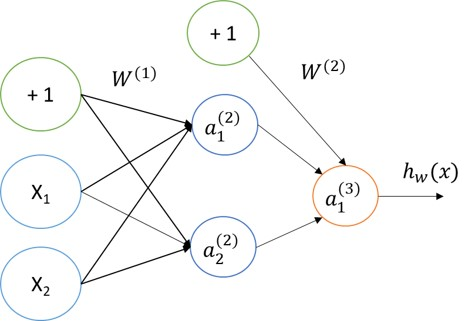

## Methodology

For implementing this exercise we will follow the next steps:

1. Generate the XOR dataset
2. Initialize weights (W) function
3. Forward propagation function
4. Cost and sigma derivative functions
5. Backpropagation function
6. XOR model function
7. Evaluate performance


### 1.  Generate the XOR dataset

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

x = (200, 2) 	y = (200, 1)


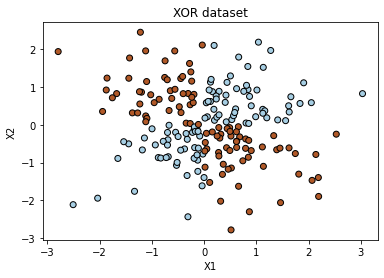

In [2]:
# 1. Generating XOR dataset
np.random.seed(1)
X = np.random.randn(200, 2)
# print(x)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired, edgecolors = 'k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR dataset')

# print(y)
y = y.reshape(-1, 1)
print('x =', X.shape, '\ty =', y.shape)

### 2. Initialize weights function

Remember, now our weights depends on the number of features and activation functions.

- $m$ is the number of features
- $n_h$ is the number of activation units in the hidden layer
- $n_y$ is de number of output neuron


In [3]:
# 2. Implement a function to intialize all the weights

# m, number of features
# nh, number of activation units in the hidden layer
# ny, number of output neurons

def init_w(m, nh, ny):
    np.random.seed(2)
    
    W1 = np.random.randn(nh, m) * 0.01
    b1 = np.zeros(shape = (nh, 1))
    W2 = np.random.randn(ny, nh) * 0.01
    b2 = np.zeros(shape = (ny, 1))
    
    W = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return W

# Testing the function
m = X.shape[1] # features on x
nh = 2 # hidden neurons
ny = 1 # outputs units

W = init_w(m, nh, ny)
print(W['W1'].shape, 'W1:\n', W['W1'])
print(W['b1'].shape, 'b1:\n', W['b1'])
print(W['W2'].shape, 'W2:\n', W['W2'])
print(W['b2'].shape, 'b2:\n', W['b2'])

(2, 2) W1:
 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
(2, 1) b1:
 [[0.]
 [0.]]
(1, 2) W2:
 [[-0.01793436 -0.00841747]]
(1, 1) b2:
 [[0.]]


Expected output:

```
(2, 2) W1:
 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
(2, 1) b1:
 [[ 0.]
 [ 0.]]
(1, 2) W2:
 [[-0.01793436 -0.00841747]]
(1, 1) b2:
 [[ 0.]]
 ```

### 3. Implement the forward propagation

For the activation function at the output we will use the sigmoid: 

$$
h_{w}(x) = g(z) = \frac{1}{1 + \mathcal{e}^{-z}}
$$

The equations of the forward propagation are as follows:

- $a^{(1)} = x$
- $z^{(2)} = W^{(1)}a^{(1)} + b_1$
- $a^{(2)} = g(z^{(2)})$
- $z^{(3)} = W^{(2)}a^{(2)} + b_2$
- $a^{(3)} = g(z^{(3)})$

In [4]:
# Sigmoid function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

# Implement forward propagation to calculate ouput probabilites

def forward(x, W):
    W1 = W['W1']
    b1 = W['b1']
    W2 = W['W2']
    b2 = W['b2']
    
    a1 = x
    Z2 = np.dot(a1, W1.T) + b1.T
    a2 = sigmoid(Z2)
    Z3 = np.dot(a2, W2.T) + b2
    a3 = sigmoid(Z3)
    
    Z = {'Z2': Z2, 'a2': a2, 'Z3': Z3, 'a3': a3}
    return a3, Z

In [5]:
a3, Z = forward(X, W)
print('a3 =', a3.shape)

a3 = (200, 1)


Expected output:

```
a3 = (200, 1)
```

### 4. Cost and sigma derivative functions

Implement the cost function, and sigmoid function derivative:

$$
E = \frac{1}{2} \sum_{k \in K}(a_k - y_k)^2
$$

$$
\mathcal{J} = \frac{1}{m} \sum_m E_m 
$$


$$
g'(z^{(l)}) = a^{(l)} * (1 - a^{(l)}) 
$$

In [6]:
# Cost function
def cost(a, y):
    J = np.sum((a - y)**2) / (2 * m)
    return J

# Derivative of sigmoid function
def d_sigmoid(z):
    ds = sigmoid(z) * (1 - sigmoid(z))
    return ds

In [7]:
print('Cost =', cost(a3, y))

Cost = 12.500585115263574


Expected output:

```
Cost = 50.0023404611
```

### 5. Backpropagation function

The equations of the backpropagation for the Neural Network are as follows:

- $\delta^{(3)} = a^{(3)}-y$
- $\delta^{(2)} = W^{(2)} \delta^{(3)}*g'(z^{(2)})$
- Gradient:
    - $\frac{\partial}{\partial W^{(1)}} J(W) = \frac{1}{m}\delta^{(2)} X$
    - $\frac{\partial}{\partial W^{(2)}} J(W) = \frac{1}{m}\delta^{(3)} a^{(2)}$
    - $\frac{\partial}{\partial b^{(1)}} J(W) = \frac{1}{m}\sum_{i=1}^{m}\delta^{(2)} $
    - $\frac{\partial}{\partial b^{(2)}} J(W) = \frac{1}{m}\sum_{i=1}^{m}\delta^{(3)} $

In [8]:
# 5. Backpropagation algorithm

def backp(W, Z, X, y):
    m = X.shape[1]
    
    W1 = W['W1']
    W2 = W['W2']
    a2 = Z['a2']
    a3 = Z['a3']
    Z2 = Z['Z2']
    Z3 = Z['Z3']
    
    d3 = a3 - y
    d2 = np.dot(d3, W2) * d_sigmoid(Z2)
    
    dW1 = (1/m) * np.dot(d2.T, X)
    dW2 = (1/m) * np.dot(d3.T, a2)
    db1 = (1/m) * np.sum(d2)
    db2 = (1/m) * np.sum(d3)
    
    grad = {'dW1': dW1, 'dW2': dW2, 'db1': db1, 'db2': db2}
    return grad

### 6. XOR Model Function

1. Initialize W's
2. Calculate forward propagation
3. Calculate backpropagation
4. Update W and b
5. Plot Cost performance


In [9]:
def xor_model(x, y, nh, alpha = 0.1, epochs = 10000):
    np.random.seed(2)
    m = x.shape[1]
    ny = 1
    # 1. Initialize W's
    W = init_w(m, nh, ny)
    
    # Initialize forward propagation to calculate initial cost 
    a3, z = forward(x, W)
    
    J = []
    for i in range(epochs):
        # 2. Calculate forward propagation
        a3, z = forward(x, W)
        J.append(cost(a3, y))
        
        # 3. Calculate backpropagation
        grad = backp(W, z, x, y)
        
        # 4. Update w's and b's here
        W['W1'] = W['W1'] - alpha * grad['dW1']
        W['W2'] = W['W2'] - alpha * grad['dW2']
        W['b1'] = W['b1'] - alpha * grad['db1']
        W['b2'] = W['b2'] - alpha * grad['db2']
        
    print('Final cost:', J[epochs-1])
    return W, J

Final cost: 10.07694226130765
W1 = [[ -0.13608863   0.09729799]
 [-17.85871685  17.02315962]]
b1 =  [[-21.09368259]
 [-21.09368259]]
W2 =  [[-0.32648167  4.07875253]]
b2 =  [[-0.62314502]]


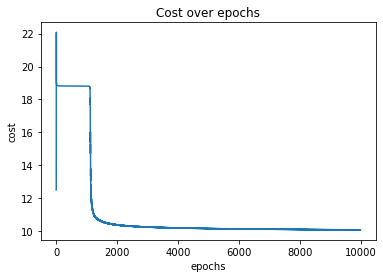

In [10]:
# Now call your model with 2 neurons on hidden layer, alpha 0.1 and 6000 epochs
W, J = xor_model(X, y, nh, alpha = 0.1, epochs = 10000)

print('W1 =', W['W1'])
print("b1 = ", W['b1'])
print("W2 = ", W['W2'])
print("b2 = ", W['b2'])

# 5. Plot Cost
plt.plot(J)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost');

### 7. Evaluate performance

For evaluating the performance of the classification we will implement the next functions:

1. Prediction
2. Accuracy
3. Decision boundary


In [11]:
def predict(x, W):
    a3, Z = forward(x, W)
    y_hat = list(map(lambda x : 1 if x > 0.5 else 0, a3))
    y_hat = np.array(y_hat)
    y_hat = y_hat.reshape(-1, 1)
    return y_hat

def accuracy(y_hat, y):
    m = len(y)
    tptn = (y == y_hat).sum()
    acc = tptn / m
    return acc

def decision_boundary(x, y, w, ax):
    # Graph's minimums and maximums
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    
    # Surface graph matrix
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Graph color values
    Z1 = predict(np.c_[xx.ravel(), yy.ravel()], w)
    
    # Predictions vector to matrix
    Z1 = Z1.reshape(xx.shape)
    
    # Graph surface
    ax.contourf(xx, yy, Z1, cmap = plt.cm.tab20c)
    ax.scatter(x[:, 0], x[:, 1], c = y.squeeze(), cmap = plt.cm.tab20c)

Text(0, 0.5, 'x2')

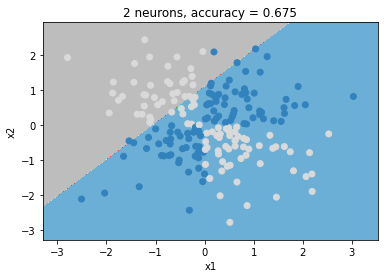

In [12]:
# Plot the XOR function and its decision boundary
y_hat = predict(X, W)
acc = accuracy(y_hat, y)
ax = plt.subplot()
decision_boundary(X, y, W, ax)
ax.set_title(f'2 neurons, accuracy = {acc}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

## Adding more activation units

If we add more neurons to the hidden layer, we say 3, 4, 5 or 6, what we expect about the classification performancce? 

Final cost: 7.447707491249844
Final cost: 3.1018667059516307
Final cost: 0.9632289722939174
Final cost: 1.0364069955734445


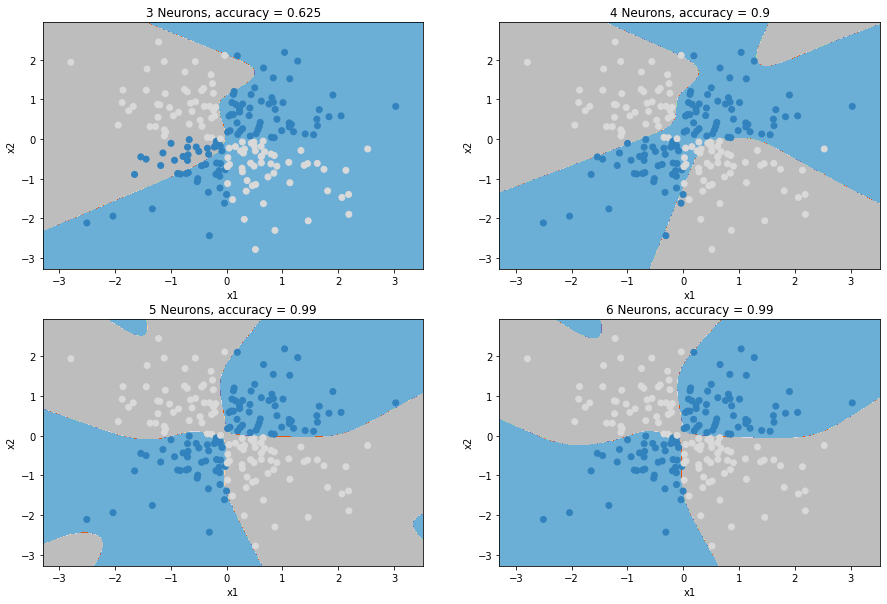

In [13]:
hidden = [3, 4, 5, 6]
axi = 1
f, axa = plt.subplots(2, 2, figsize = (15, 10))

for h in hidden:
    W, J = xor_model(X, y, h, alpha = 0.01, epochs = 10000)
    y_hat = predict(X, W)
    acc = accuracy(y_hat, y)
    
    ax = plt.subplot(2, 2, axi)
    axi += 1
    decision_boundary(X, y, W, ax)
    ax.set_title(f'{h} Neurons, accuracy = {acc}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')